In [28]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore, skew, kurtosis


Ucitavanje podataka

In [29]:

data = pd.read_csv("../data/gait.csv")  
print(data.head())  


   subject  condition  replication  leg  joint  time     angle
0        1          1            1    1      1     0  4.682881
1        1          1            1    1      1     1  5.073127
2        1          1            1    1      1     2  5.229774
3        1          1            1    1      1     3  5.083273
4        1          1            1    1      1     4  4.652399


Rekodiranje nedostajucih vrijednosti

In [30]:
MISSING_ANGLE_VALUE = -9999

columns_to_replace_with_empty = ['subject', 'condition', 'replication', 'leg', 'joint', 'time']
data[columns_to_replace_with_empty] = data[columns_to_replace_with_empty].fillna('empty')
data['angle'] = data['angle'].fillna(MISSING_ANGLE_VALUE)

data['subject'] = data['subject'].apply(lambda x: x if x in range(0, 11) else 'empty')
data['condition'] = data['condition'].apply(lambda x: x if x in [1, 2, 3] else 'empty')
data['replication'] = data['replication'].apply(lambda x: x if x in range(1, 11) else 'empty')
data['leg'] = data['leg'].apply(lambda x: x if x in [1, 2] else 'empty')
data['joint'] = data['joint'].apply(lambda x: x if x in [1, 2, 3] else 'empty')
data['time'] = data['time'].apply(lambda x: x if x is not None and 0 <= x <= 100 else 'empty')
data['angle'] = data['angle'].apply(lambda x: x if -90 <= x <= 90 else MISSING_ANGLE_VALUE)

print(data)

        subject  condition  replication  leg  joint  time      angle
0             1          1            1    1      1     0   4.682881
1             1          1            1    1      1     1   5.073127
2             1          1            1    1      1     2   5.229774
3             1          1            1    1      1     3   5.083273
4             1          1            1    1      1     4   4.652399
...         ...        ...          ...  ...    ...   ...        ...
181795       10          3           10    2      3    96  29.778412
181796       10          3           10    2      3    97  29.247559
181797       10          3           10    2      3    98  28.796951
181798       10          3           10    2      3    99  28.432936
181799       10          3           10    2      3   100  28.136438

[181800 rows x 7 columns]


Prepoznavanje uniformnih ili nelogicnih distribucija

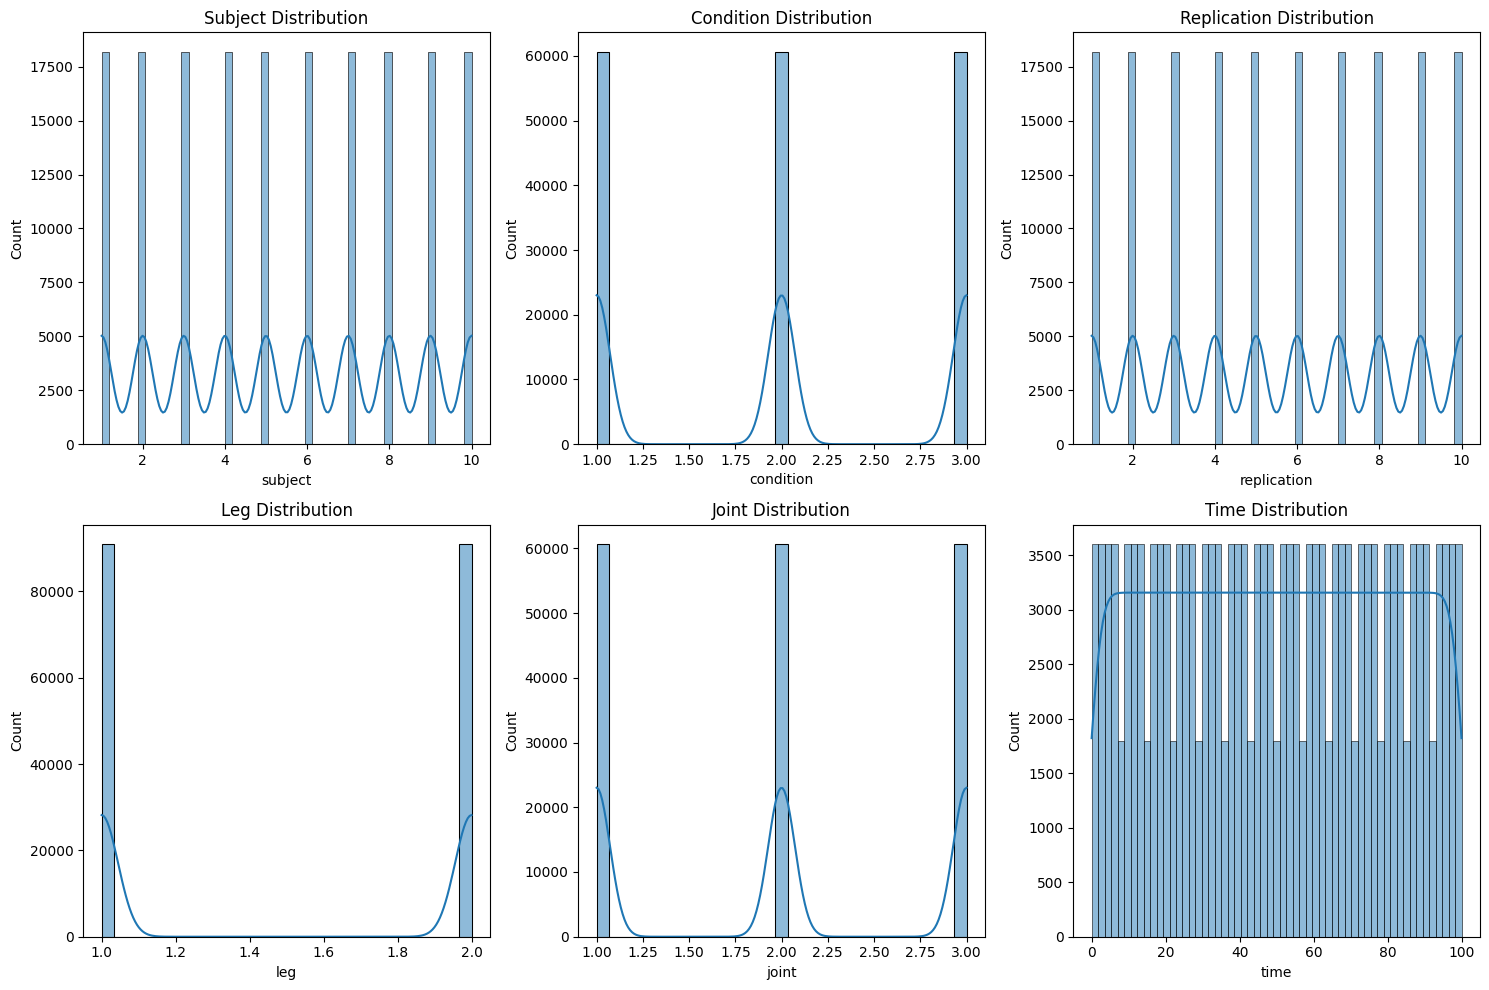

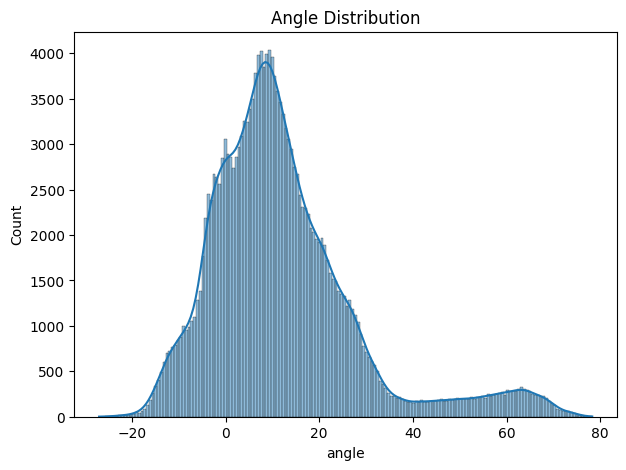

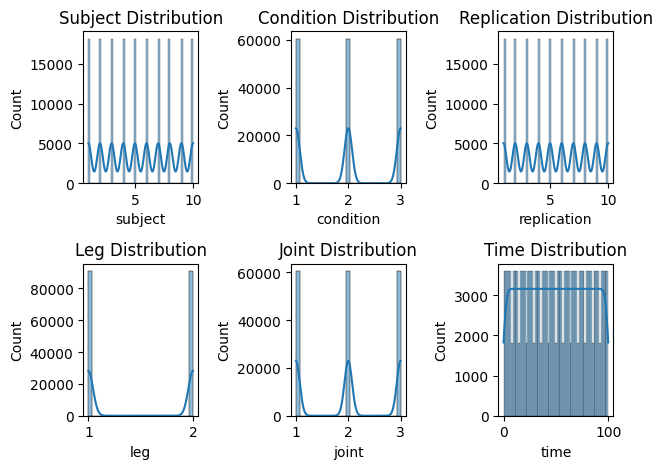

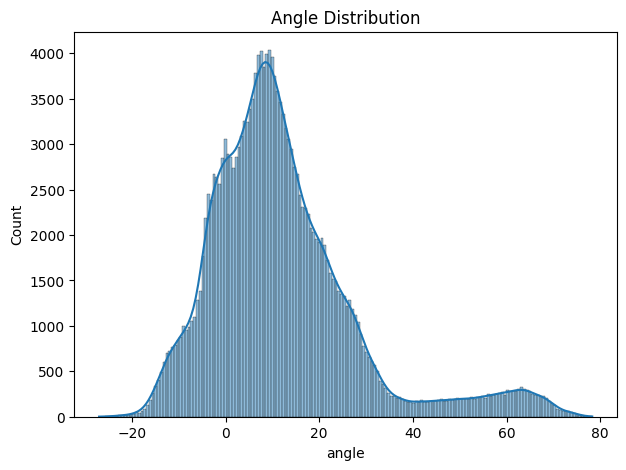

In [31]:

plt.figure(figsize=(15, 10))

# subject
plt.subplot(2, 3, 1)
sns.histplot(data['subject'], kde=True)
plt.title('Subject Distribution')

# condition
plt.subplot(2, 3, 2)
sns.histplot(data['condition'], kde=True)
plt.title('Condition Distribution')

# replication
plt.subplot(2, 3, 3)
sns.histplot(data['replication'], kde=True)
plt.title('Replication Distribution')

# leg
plt.subplot(2, 3, 4)
sns.histplot(data['leg'], kde=True)
plt.title('Leg Distribution')

# joint
plt.subplot(2, 3, 5)
sns.histplot(data['joint'], kde=True)
plt.title('Joint Distribution')

# time
plt.subplot(2, 3, 6)
sns.histplot(data['time'], kde=True)
plt.title('Time Distribution')

plt.tight_layout()
plt.show()

# angle
plt.figure(figsize=(7, 5))
sns.histplot(data['angle'], kde=True)
plt.title('Angle Distribution')
plt.show()

# subject
plt.subplot(2, 3, 1)
sns.histplot(data['subject'], kde=True)
plt.title('Subject Distribution')

# condition
plt.subplot(2, 3, 2)
sns.histplot(data['condition'], kde=True)
plt.title('Condition Distribution')

# replication
plt.subplot(2, 3, 3)
sns.histplot(data['replication'], kde=True)
plt.title('Replication Distribution')

# leg
plt.subplot(2, 3, 4)
sns.histplot(data['leg'], kde=True)
plt.title('Leg Distribution')

# joint
plt.subplot(2, 3, 5)
sns.histplot(data['joint'], kde=True)
plt.title('Joint Distribution')

# time
plt.subplot(2, 3, 6)
sns.histplot(data['time'], kde=True)
plt.title('Time Distribution')

plt.tight_layout()
plt.show()

# angle
plt.figure(figsize=(7, 5))
sns.histplot(data['angle'], kde=True)
plt.title('Angle Distribution')
plt.show()

Provjeriti / redizajnirati /odrediti ciljnu varijablu i njenu kvalitetu

Pokretnost gleznja (ankle), condition == 1

Ocekivano ponasanje je da steznik gleznja ogranicava pokretnost gleznja, odnosno smanjuje raspon (kut) koje glezanj moze postici. Steznik koljena nema veliki utjecaj na pokretnost gleznja.

Text(0.5, 1.0, 'Angle distribution for ankle with ankle brace')

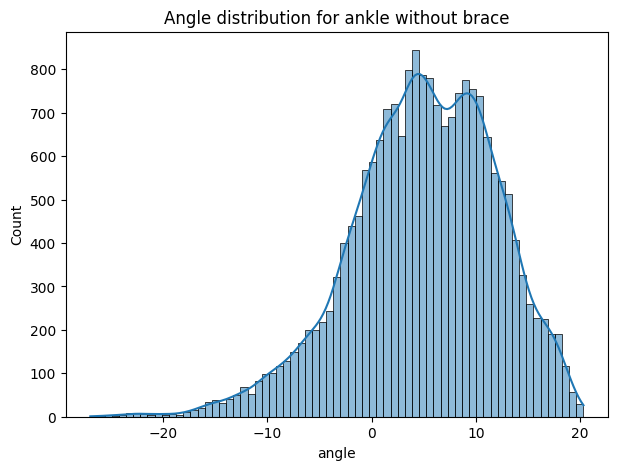

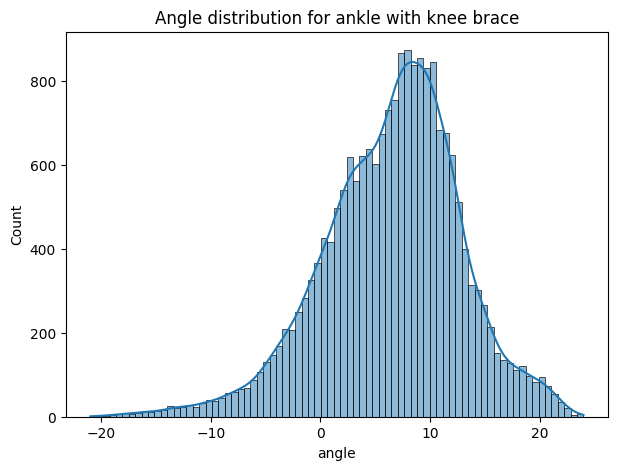

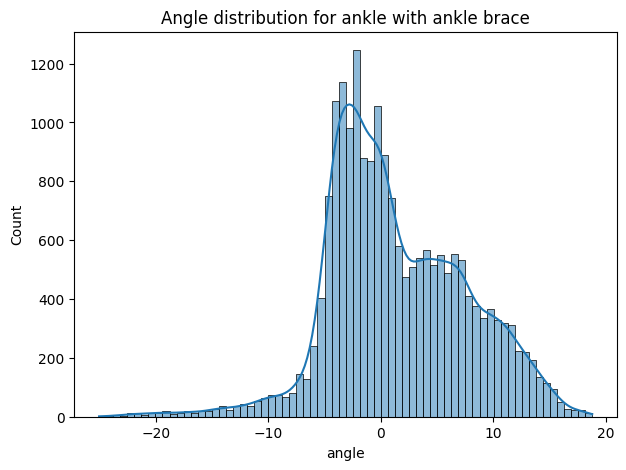

In [32]:
# unbraced (condition == 1) and ankle joint angle (joint == 1)
plt.figure(figsize=(7, 5))
sns.histplot(data[(data['condition'] == 1)  & (data['joint'] == 1)]['angle'], kde=True)
plt.title('Angle distribution for ankle without brace')

# knee brace (condition == 2) and ankle joint angle (joint == 1)
plt.figure(figsize=(7, 5))
sns.histplot(data[(data['condition'] == 2)  & (data['joint'] == 1)]['angle'], kde=True)
plt.title('Angle distribution for ankle with knee brace')

#  ankle brace (condition == 3) and ankle joint angle (joint == 1)
plt.figure(figsize=(7, 5))
sns.histplot(data[(data['condition'] == 3)  & (data['joint'] == 1)]['angle'], kde=True)
plt.title('Angle distribution for ankle with ankle brace')


Pokretnost koljena (knee), condition == 2

Ocekivano ponasanje je da steznik koljena ogranicava pokretnost koljena, odnosno smanjuje raspon kuta (angle) koje koljeno moze postici. Steznik gleznja nema veliki utjecaj na pokretnost koljena.

Text(0.5, 1.0, 'Angle distribution for knee with ankle brace')

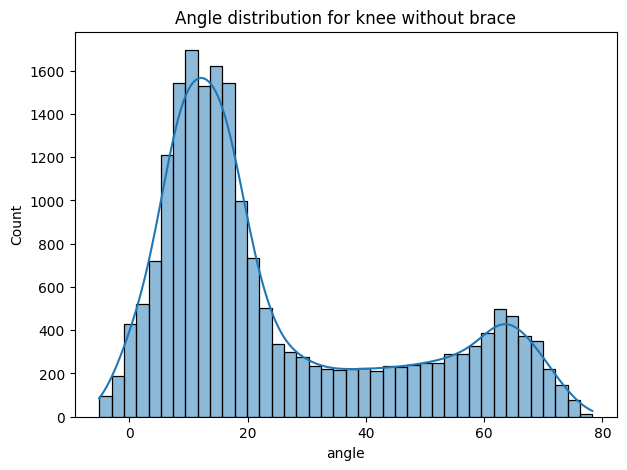

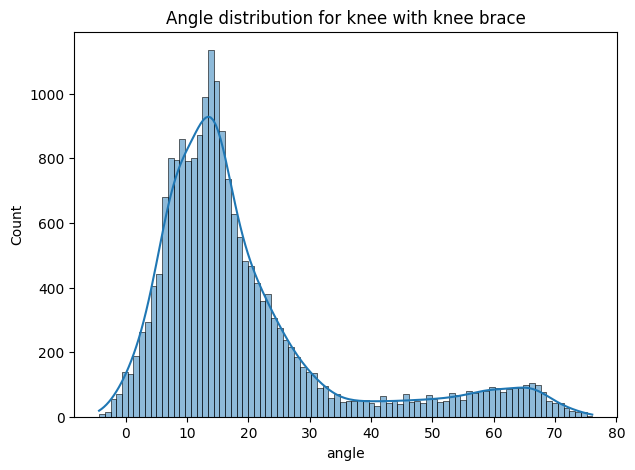

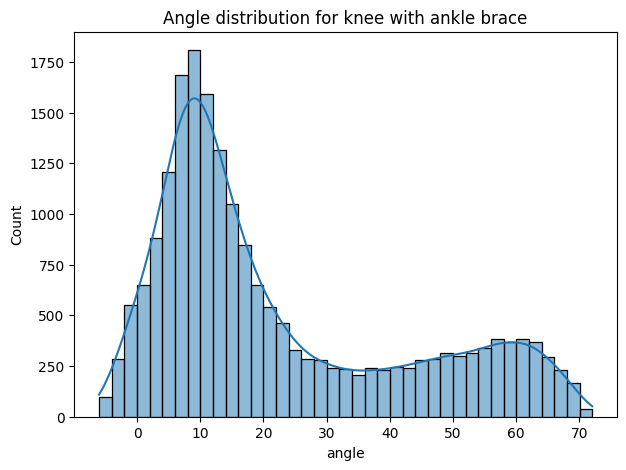

In [33]:
# unbraced (condition == 1) and knee joint angle (joint == 2)
plt.figure(figsize=(7, 5))
sns.histplot(data[(data['condition'] == 1)  & (data['joint'] == 2)]['angle'], kde=True)
plt.title('Angle distribution for knee without brace')

# knee brace (condition == 2) and knee joint angle (joint == 2)
plt.figure(figsize=(7, 5))
sns.histplot(data[(data['condition'] == 2)  & (data['joint'] == 2)]['angle'], kde=True)
plt.title('Angle distribution for knee with knee brace')

#  ankle brace (condition == 3) and knee joint angle (joint == 2)
plt.figure(figsize=(7, 5))
sns.histplot(data[(data['condition'] == 3)  & (data['joint'] == 2)]['angle'], kde=True)
plt.title('Angle distribution for knee with ankle brace')

Pokretnost kuka (hip), condition == 3

Ocekivano ponasanje je da steznik koljena i steznik gleznja znacajno ne utjecu na pokretnost kuka.

Text(0.5, 1.0, 'Angle distribution for hip with ankle brace')

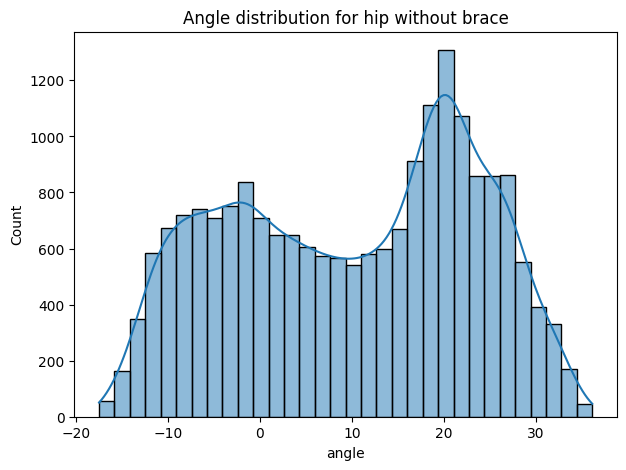

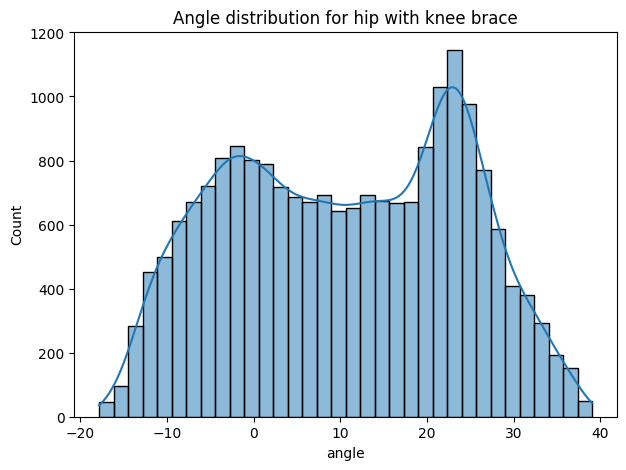

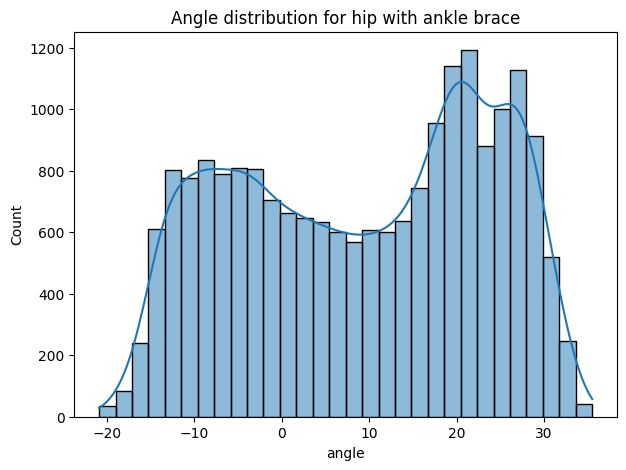

In [34]:
# unbraced (condition == 1) and hip joint angle (joint == 3)
plt.figure(figsize=(7, 5))
sns.histplot(data[(data['condition'] == 1)  & (data['joint'] == 3)]['angle'], kde=True)
plt.title('Angle distribution for hip without brace')

# knee brace (condition == 2) and hip joint angle (joint == 3)
plt.figure(figsize=(7, 5))
sns.histplot(data[(data['condition'] == 2)  & (data['joint'] == 3)]['angle'], kde=True)
plt.title('Angle distribution for hip with knee brace')

# ankle brace (condition == 3) and hip joint angle (joint == 3)
plt.figure(figsize=(7, 5))
sns.histplot(data[(data['condition'] == 3)  & (data['joint'] == 3)]['angle'], kde=True)
plt.title('Angle distribution for hip with ankle brace')

Statisticke analize uzorka podataka

Mean (srednja vrijednost): 12.149320915115677
Skewness (nagnutost distribucije): 1.3795022223153621
Kurtosis (zaobljenost distribucije): 2.5208141911249182


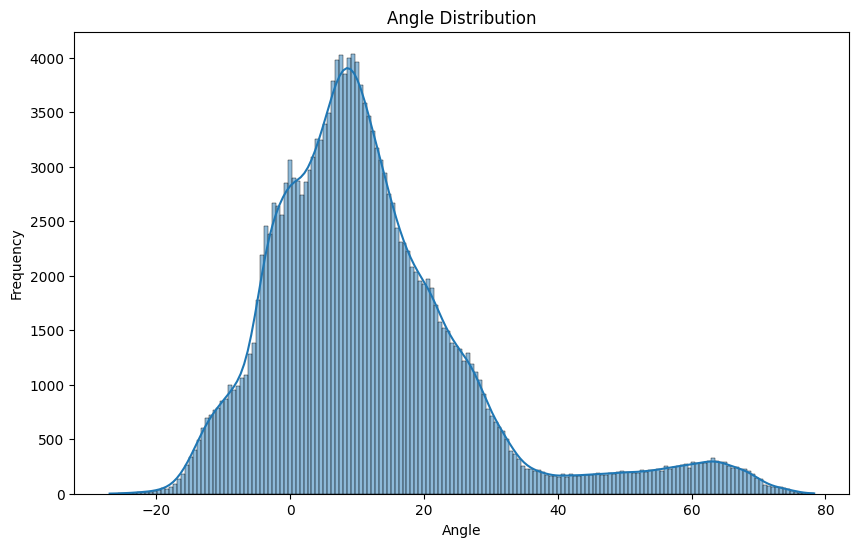

In [35]:
mean = data['angle'].mean()
z_scores = zscore(data['angle'])
skewness = skew(data['angle'])
kurt = kurtosis(data['angle'])

print(f"Mean (srednja vrijednost): {mean}")
print(f"Skewness (nagnutost distribucije): {skewness}")
print(f"Kurtosis (zaobljenost distribucije): {kurt}")

data['z_scores'] = z_scores

plt.figure(figsize=(10, 6))
sns.histplot(data['angle'], kde=True)
plt.title('Angle Distribution')
plt.xlabel('Angle')
plt.ylabel('Frequency')
plt.show()